In [99]:
from common_imports import *

import regex as re

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stop_english = stopwords.words('english')
stop_english.extend(('say', 'says', 'saying', 'said', 'new', 'would', 'want', 'wanted', 'wants', 'wanting', 'still', 'must', 'also', 'time', 'year', 'however', 'first', 'university', 'research', 'analysis', 'study', 'journal', 'press', 'number', 'group', 'groups', 'among', 'sociology', 'table', 'different', 'less', 'that', 'one', 'may', 'two', 'percent', 'use', 'within', 'york', 'see', 'thus', 'high', 'level', 'well', 'three', 'data'))


In [23]:
cc = counter('count2-pruned')

Loading count2-pruned from disk...


In [32]:
print(count2-pruned)

NameError: name 'count2' is not defined

# year trends

In [24]:
mny = min(cc.items('fy'))
mxy = max(cc.items('fy'))

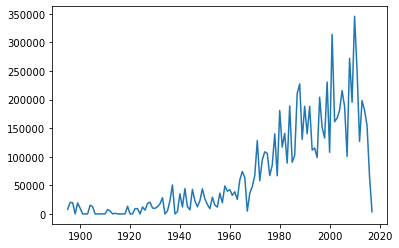

In [25]:
ys = range(mny, mxy+1)
cs = [cc(fy=y) for y in ys]

plt.plot(ys,cs);

# term year trends

In [101]:
terms = cc.items('t')

def flatten(t):
    return [item for sublist in t for item in sublist]

terms_processed = [word.split("-") for word in terms]
terms_processed = flatten(terms_processed)

terms_processes = [re.findall("[A-Za-z]+", word) for word in terms_processed]
terms_processed = [SnowballStemmer("english").stem(word) for word in terms_processed]
terms_processed = [item for item in terms_processed if len(item)>2]
terms_processed = [item for item in terms_processed if item not in stop_english]


res = []
[res.append(x) for x in terms_processed if x not in res]

print(len(res))

top_terms = sorted(res, key=lambda x:-cc(t=x))[:10]
print(top_terms)

4247
['social', 'women', 'work', 'american', 'model', 'life', 'state', 'class', 'health', 'men']


In [102]:
ys = range(1970, 2015)
tot_cs = np.array([cc(fy=y) for y in ys])
tot_cs[tot_cs==0] = 1 # for div 0

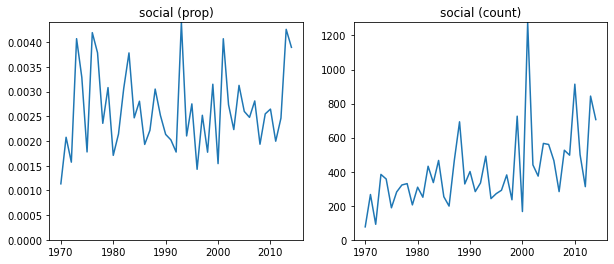

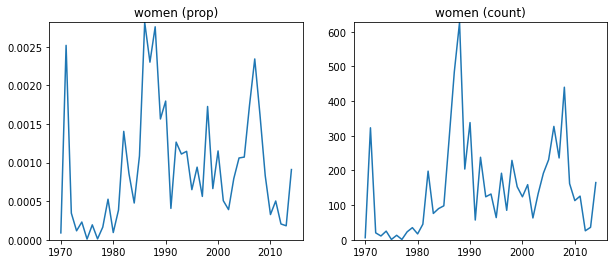

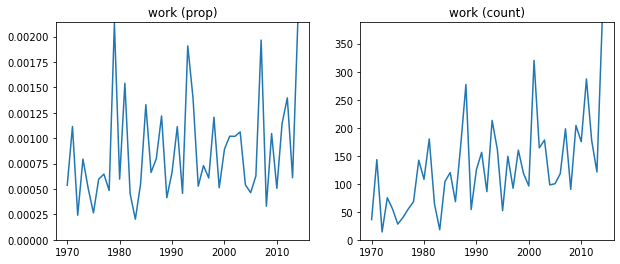

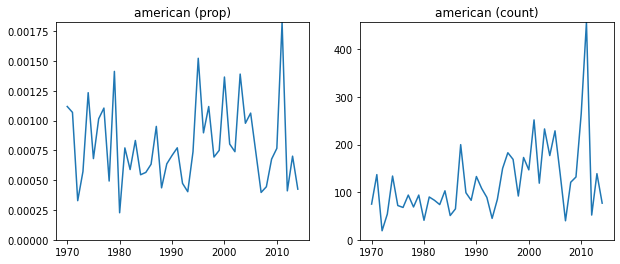

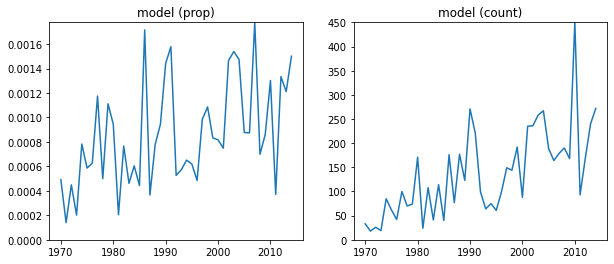

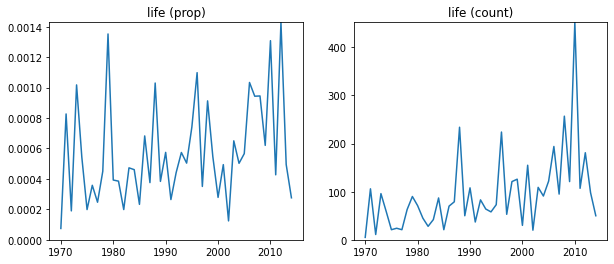

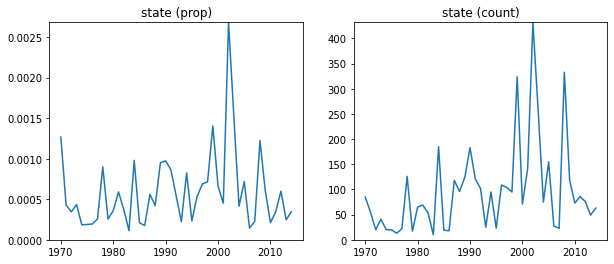

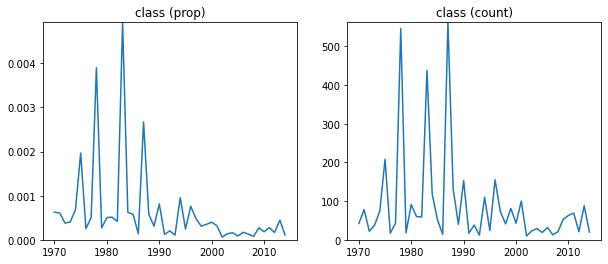

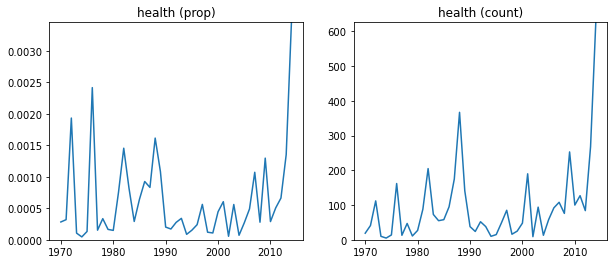

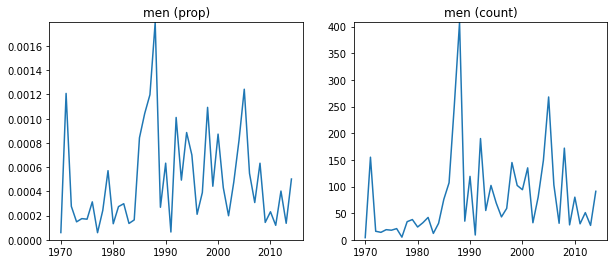

In [103]:
for t in top_terms:
    
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    cs = np.array([cc(fy=y, t=t) for y in ys])
    plt.plot( ys,cs/tot_cs )
    plt.title(f'{t} (prop)')
    plt.ylim(0, np.max(cs/tot_cs))
    
    plt.subplot(1,2,2)
    plt.plot( ys,cs )
    plt.ylim(0, np.max(cs))
    plt.title(f'{t} (count)')
    plt.show()

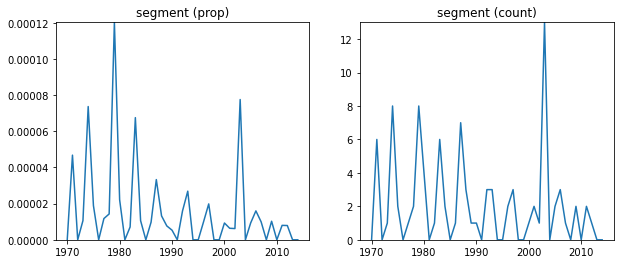

<ipython-input-105-384d4cb2f621>:9: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim(0, np.max(cs/tot_cs))
<ipython-input-105-384d4cb2f621>:13: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim(0, np.max(cs))


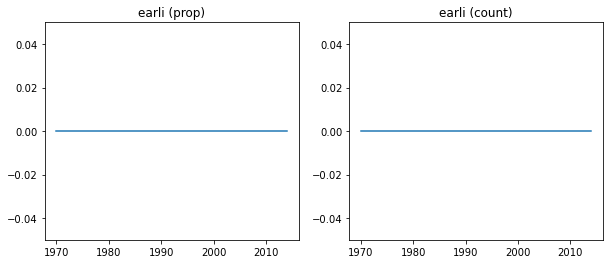

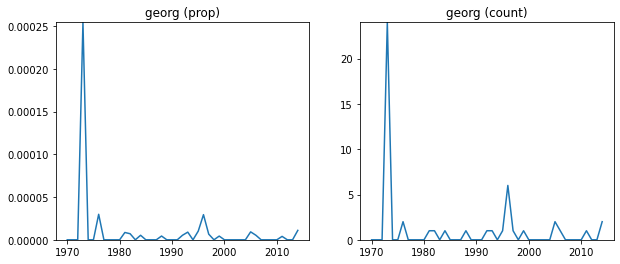

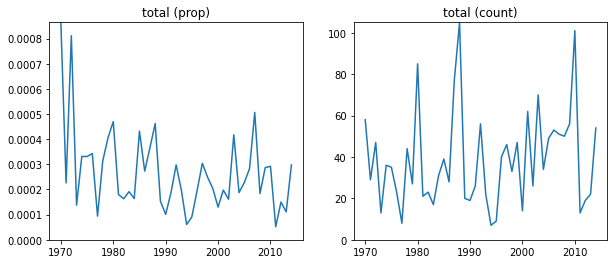

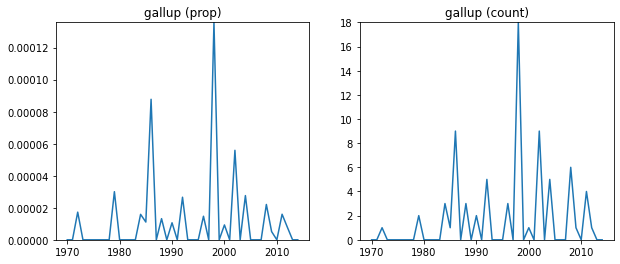

<ipython-input-105-384d4cb2f621>:9: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim(0, np.max(cs/tot_cs))
<ipython-input-105-384d4cb2f621>:13: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim(0, np.max(cs))


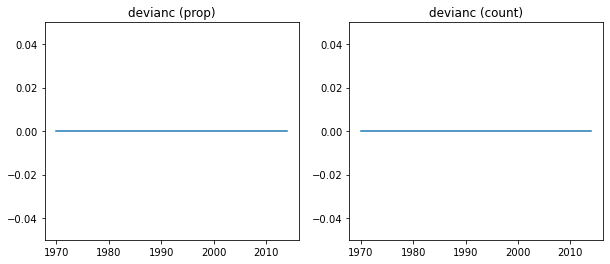

<ipython-input-105-384d4cb2f621>:9: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim(0, np.max(cs/tot_cs))
<ipython-input-105-384d4cb2f621>:13: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim(0, np.max(cs))


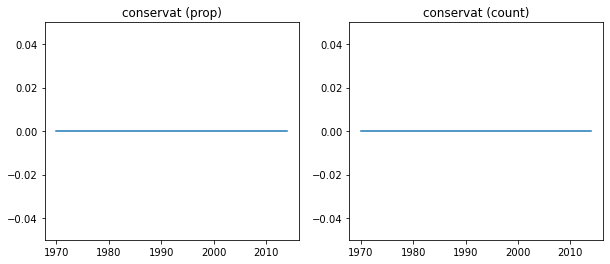

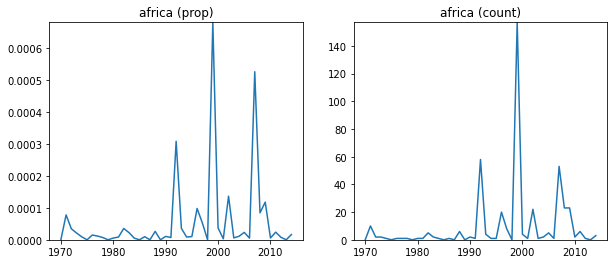

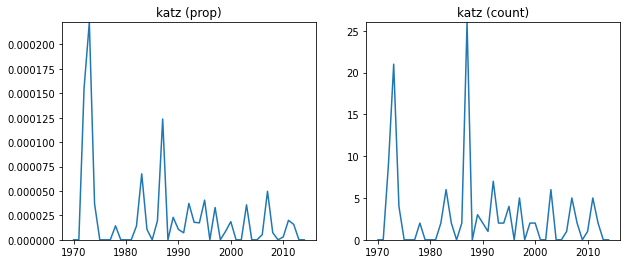

<ipython-input-105-384d4cb2f621>:9: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim(0, np.max(cs/tot_cs))
<ipython-input-105-384d4cb2f621>:13: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  plt.ylim(0, np.max(cs))


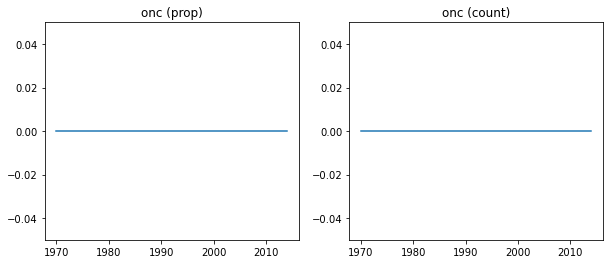

In [105]:
for t in sample(res, 10):
    
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    cs = np.array([cc(fy=y, t=t) for y in ys])
    plt.plot( ys,cs/tot_cs )
    plt.title(f'{t} (prop)')
    plt.ylim(0, np.max(cs/tot_cs))
    
    plt.subplot(1,2,2)
    plt.plot( ys,cs )
    plt.ylim(0, np.max(cs))
    plt.title(f'{t} (count)')
    plt.show()